In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

In [2]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [3]:
import numpy as np
import pandas as pd

In [4]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

### load datasets

In [5]:
datasets = {}

##### MNIST

In [6]:
from tensorflow.keras.datasets import mnist

# load dataset
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
X_train = (train_images/255.).astype('float32')
X_test = (test_images/255.).astype('float32')
X_train = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))

# subset a validation set
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

# flatten X
X_train_flat = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test_flat = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))
X_valid_flat= X_valid.reshape((len(X_valid), np.product(np.shape(X_valid)[1:])))
print(len(X_train), len(X_valid), len(X_test))

50000 10000 10000


In [7]:
datasets['mnist'] = {'X':{}, 'Y':{}}
datasets['mnist']['X']['train'] = X_train
datasets['mnist']['X']['valid'] = X_valid
datasets['mnist']['X']['test'] = X_test
datasets['mnist']['Y']['train'] = Y_train
datasets['mnist']['Y']['valid'] = Y_valid
datasets['mnist']['Y']['test'] = Y_test

##### cifar10

In [8]:
from tensorflow.keras.datasets import cifar10

# load dataset
(train_images, Y_train), (test_images, Y_test) = cifar10.load_data()
X_train = (train_images/255.).astype('float32')
X_test = (test_images/255.).astype('float32')
X_train = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))

# subset a validation set
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:].flatten()
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid].flatten()
Y_test = Y_test.flatten()

print(len(X_train), len(X_valid), len(X_test))

40000 10000 10000


In [9]:
datasets['cifar10'] = {'X':{}, 'Y':{}}
datasets['cifar10']['X']['train'] = X_train
datasets['cifar10']['X']['valid'] = X_valid
datasets['cifar10']['X']['test'] = X_test
datasets['cifar10']['Y']['train'] = Y_train
datasets['cifar10']['Y']['valid'] = Y_valid
datasets['cifar10']['Y']['test'] = Y_test

##### FMNIST

In [10]:
from tensorflow.keras.datasets import fashion_mnist

# load dataset
(train_images, Y_train), (test_images, Y_test) = fashion_mnist.load_data()
X_train = (train_images/255.).astype('float32')
X_test = (test_images/255.).astype('float32')
X_train = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))

# subset a validation set
n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

# flatten X
X_train_flat = X_train.reshape((len(X_train), np.product(np.shape(X_train)[1:])))
X_test_flat = X_test.reshape((len(X_test), np.product(np.shape(X_test)[1:])))
X_valid_flat= X_valid.reshape((len(X_valid), np.product(np.shape(X_valid)[1:])))
print(len(X_train), len(X_valid), len(X_test))

50000 10000 10000


In [11]:
datasets['fmnist'] = {'X':{}, 'Y':{}}
datasets['fmnist']['X']['train'] = X_train
datasets['fmnist']['X']['valid'] = X_valid
datasets['fmnist']['X']['test'] = X_test
datasets['fmnist']['Y']['train'] = Y_train
datasets['fmnist']['Y']['valid'] = Y_valid
datasets['fmnist']['Y']['test'] = Y_test

##### Cassins

In [12]:
syllable_df = pd.read_pickle(DATA_DIR/'cassins'/ 'cassins.pickle').drop(columns=['audio'])
top_labels = (
    pd.DataFrame(
        {i: [np.sum(syllable_df.labels.values == i)] for i in syllable_df.labels.unique()}
    )
    .T.sort_values(by=0, ascending=False)[:20]
    .T
)
top_labels
sylllable_df = syllable_df[syllable_df.labels.isin(top_labels.columns)]
sylllable_df = sylllable_df.reset_index()

specs = np.array(list(sylllable_df.spectrogram.values))
specs.shape

sylllable_df['subset'] = 'train'
sylllable_df.loc[:1000, 'subset'] = 'valid'
sylllable_df.loc[1000:1999, 'subset'] = 'test'

len(sylllable_df)

Y_train = np.array(list(sylllable_df.labels.values[sylllable_df.subset == 'train']))
Y_valid = np.array(list(sylllable_df.labels.values[sylllable_df.subset == 'valid']))
Y_test = np.array(list(sylllable_df.labels.values[sylllable_df.subset == 'test']))

X_train = np.array(list(sylllable_df.spectrogram.values[sylllable_df.subset == 'train'])) #/ 255.
X_valid = np.array(list(sylllable_df.spectrogram.values[sylllable_df.subset == 'valid']))# / 255.
X_test = np.array(list(sylllable_df.spectrogram.values[sylllable_df.subset == 'test'])) #/ 255.

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
Y_train = enc.fit_transform([[i] for i in Y_train]).astype('int').flatten()

In [13]:
datasets['cassins_dtw'] = {'X':{}, 'Y':{}}
datasets['cassins_dtw']['X']['train'] = X_train
datasets['cassins_dtw']['X']['valid'] = X_valid
datasets['cassins_dtw']['X']['test'] = X_test
datasets['cassins_dtw']['Y']['train'] = Y_train
datasets['cassins_dtw']['Y']['valid'] = Y_valid
datasets['cassins_dtw']['Y']['test'] = Y_test

##### Moons

In [14]:
from sklearn.datasets import make_moons

In [15]:
X_train, Y_train = make_moons(1000, random_state=0, noise=0.1)
X_train_flat = X_train
X_test, Y_test = make_moons(1000, random_state=1, noise=0.1)
X_test_flat = X_test
X_valid, Y_valid = make_moons(1000, random_state=2, noise=0.1)

In [16]:
datasets['moons'] = {'X':{}, 'Y':{}}
datasets['moons']['X']['train'] = X_train
datasets['moons']['X']['valid'] = X_valid
datasets['moons']['X']['test'] = X_test
datasets['moons']['Y']['train'] = Y_train
datasets['moons']['Y']['valid'] = Y_valid
datasets['moons']['Y']['test'] = Y_test

##### Bison

In [17]:
import requests
import json
url = "https://raw.githubusercontent.com/duhaime/umap-zoo/03819ed0954b524919671a72f61a56032099ba11/data/json/bison.json"
animal = np.array(json.loads(requests.get(url).text)['3d'])

X_train = animal
Y_train = animal[:, 0]

In [18]:
datasets['bison'] = {'X':{}, 'Y':{}}
datasets['bison']['X']['train'] = X_train
datasets['bison']['Y']['train'] = Y_train

##### macoskco2015

In [19]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR
import gzip
import pickle

with gzip.open(DATA_DIR / 'macosko_2015.pkl.gz', "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.1, random_state=42)

n_valid = 10000
X_valid = X_train[-n_valid:]
Y_valid = Y_train[-n_valid:]
X_train = X_train[:-n_valid]
Y_train = Y_train[:-n_valid]

X_train_flat = X_train

In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

Y_train = enc.fit_transform([[i] for i in Y_train]).flatten()

In [22]:
datasets['macosko2015'] = {'X':{}, 'Y':{}}
datasets['macosko2015']['X']['train'] = X_train
datasets['macosko2015']['X']['valid'] = X_valid
datasets['macosko2015']['X']['test'] = X_test
datasets['macosko2015']['Y']['train'] = Y_train
datasets['macosko2015']['Y']['valid'] = Y_valid
datasets['macosko2015']['Y']['test'] = Y_test

### Load projections

In [23]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [24]:
output_dir = MODEL_DIR/'projections'

In [25]:
classes = ['umap-learn', 'direct', 'network', 'autoencoder']

In [48]:
dataset_list = ['moons', 'bison',  'mnist', 'cassins_dtw', 'macosko2015', 'fmnist', 'cifar10' ]

In [49]:
projection_df = pd.DataFrame(columns = ['dataset', 'class_', 'train_z', 'train_label'])
for dataset in dataset_list:
    print(output_dir / dataset)
    for class_ in classes:
        print(output_dir / dataset / class_)
        z = np.load(output_dir / dataset / class_ / 'z.npy')
        projection_df.loc[len(projection_df)] = [dataset, class_, z, datasets[dataset]['Y']['train']]

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/umap-learn
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/direct
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/network
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/autoencoder
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/bison
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/bison/umap-learn
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/bison/direct
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/bison/network
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/bison/autoencoder
/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/mnist
/mnt/cube/t

In [50]:
projection_df[:3]

,dataset,class_,train_z,train_label
0,moons,umap-learn,"[[13.615516, 11.473363], [10.652916, 7.7839494...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, ..."
1,moons,direct,"[[10.310489, 11.975992], [8.138062, 6.483253],...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, ..."
2,moons,network,"[[15.081082, -0.14094067], [18.91516, 3.342246...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, ..."


### Plot projections

In [51]:
import matplotlib.pyplot as plt

In [52]:
from scipy.spatial import procrustes

### Procrustes alignment

In [53]:
dataset_subsets = {}

In [54]:
for dataset in dataset_list:
    dataset_subset = projection_df[projection_df.dataset == dataset]
    dataset_subset = dataset_subset.astype(object)
    z_umap_learn = dataset_subset[dataset_subset.class_ == 'umap-learn'].iloc[0]['train_z']
    unique_classes = [i for i in dataset_subset.class_.unique() if i != 'umap-learn']
    unique_classes
    dataset_subset['aligned'] = 0
    dataset_subset['aligned'] = dataset_subset['aligned'].astype(object)
    dataset_subset['disparity'] = 0
    umap_learn_row = np.where(dataset_subset.class_.values == 'umap-learn')[0][0]
    aligned_col = np.where(dataset_subset.columns == 'aligned')[0][0]
    for unique_class in unique_classes:
        class_row = np.where(dataset_subset.class_.values == unique_class)[0][0]
        z_umap_learn = dataset_subset.iloc[umap_learn_row].train_z
        z_umap = dataset_subset.iloc[class_row].train_z
        z_umaplearn_align, z_umap_align, disparity = procrustes(z_umap_learn, z_umap)
        dataset_subset.iloc[class_row,aligned_col] = [z_umap_align]
        dataset_subset.iloc[umap_learn_row,aligned_col] = [z_umaplearn_align]
    dataset_subsets[dataset] = dataset_subset

In [55]:
np.shape(z_umap_learn)

(40000, 2)

In [56]:
np.shape(z_umap)

(40000, 2)

In [57]:
dataset

'cifar10'

#### Plot dataset

In [58]:
dset_params = {
    'moons': {
        'cmap': plt.cm.coolwarm,
        's': 10,
        'alpha': 0.5,
        
    }, 
    'mnist': {
        'cmap': plt.cm.tab10,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'fmnist': {
        'cmap': plt.cm.tab10,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'bison': {
        'cmap': plt.cm.viridis,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'cifar10': {
        'cmap': plt.cm.tab10,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'cassins_dtw': {
        'cmap': plt.cm.tab20,
        's': 0.1,
        'alpha': 0.5,  
    }, 
    'macosko2015': {
        'cmap': plt.cm.tab20,
        's': 0.1,
        'alpha': 0.5,  
    }, 
}

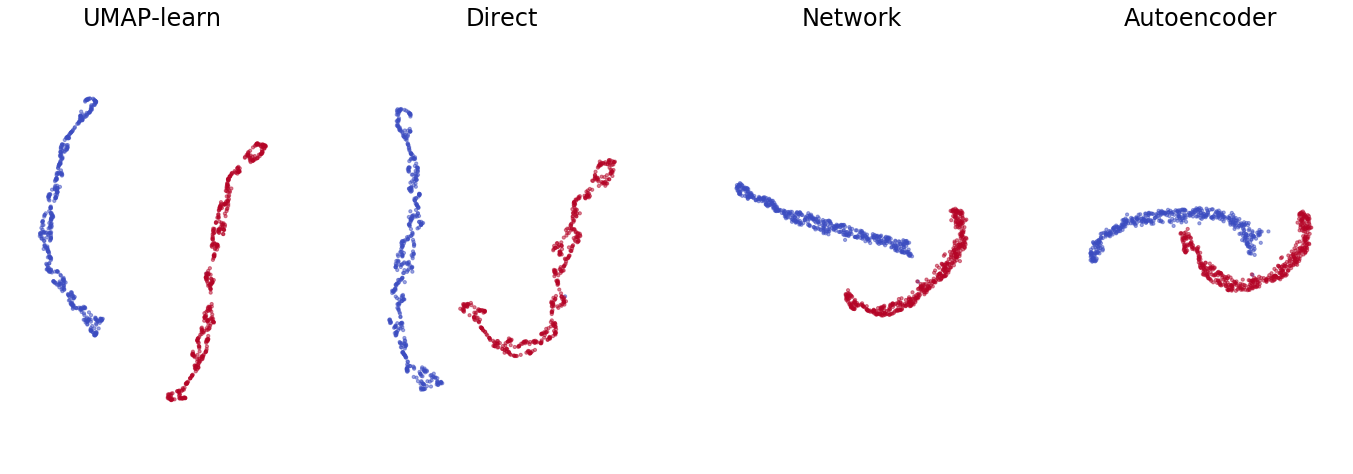

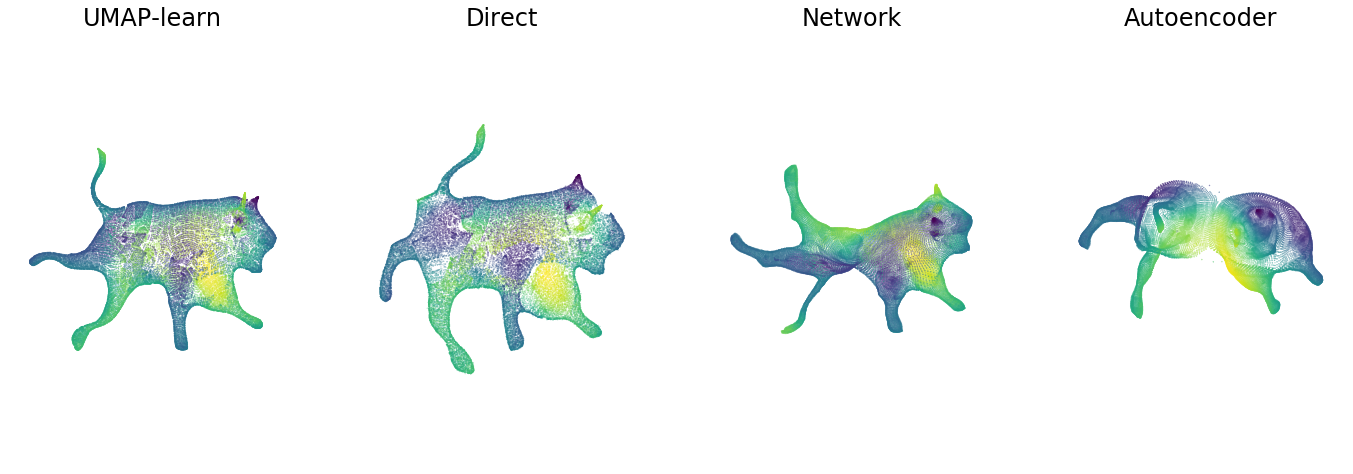

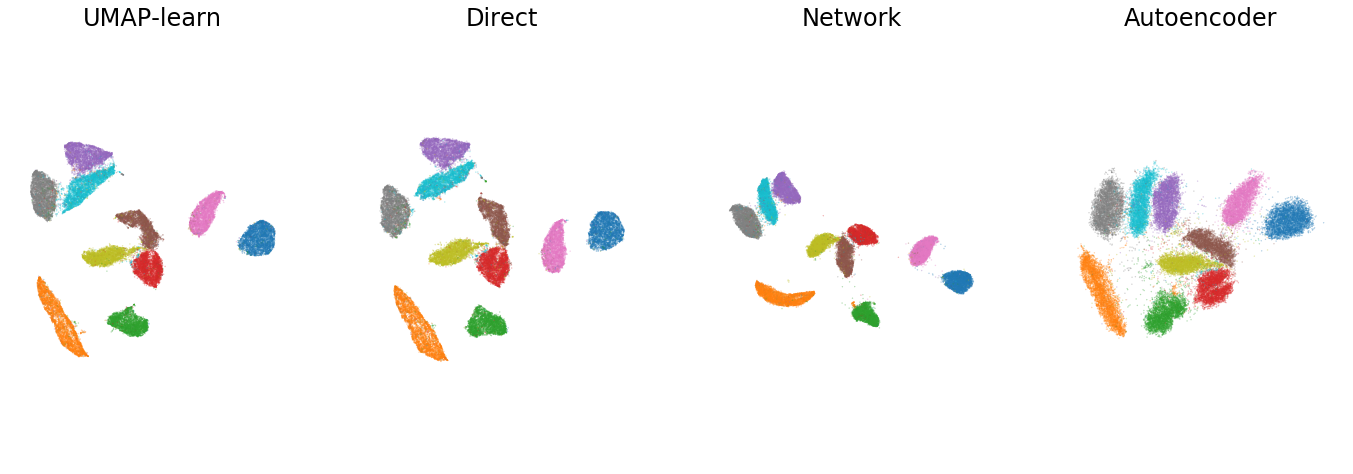

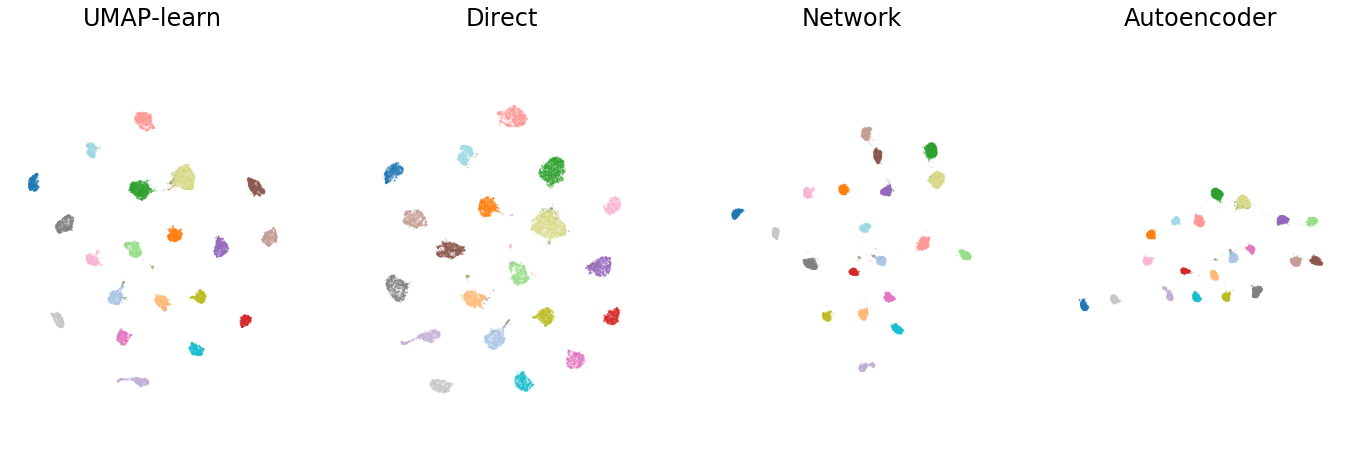

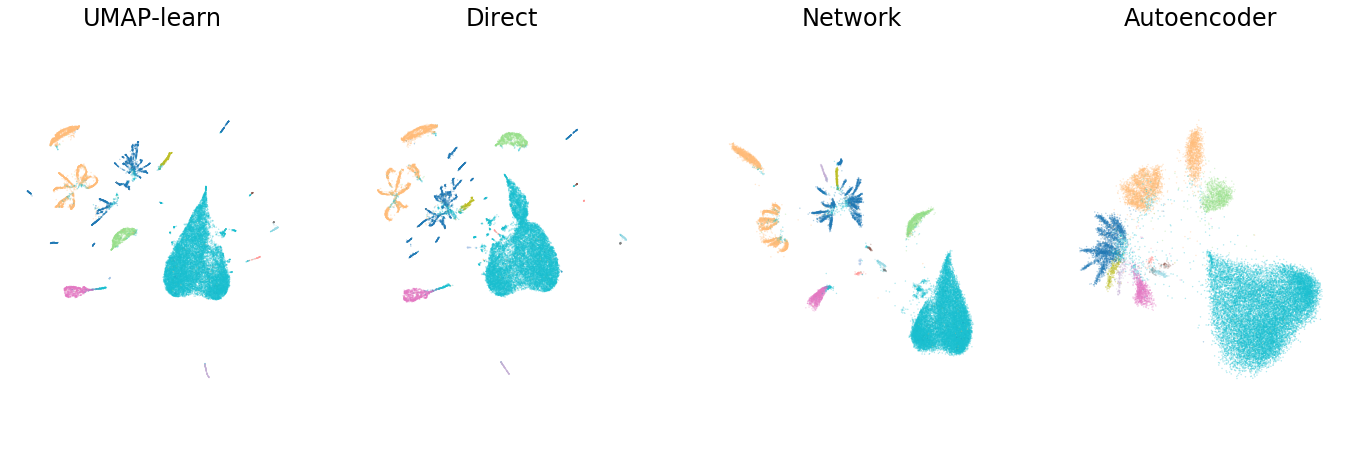

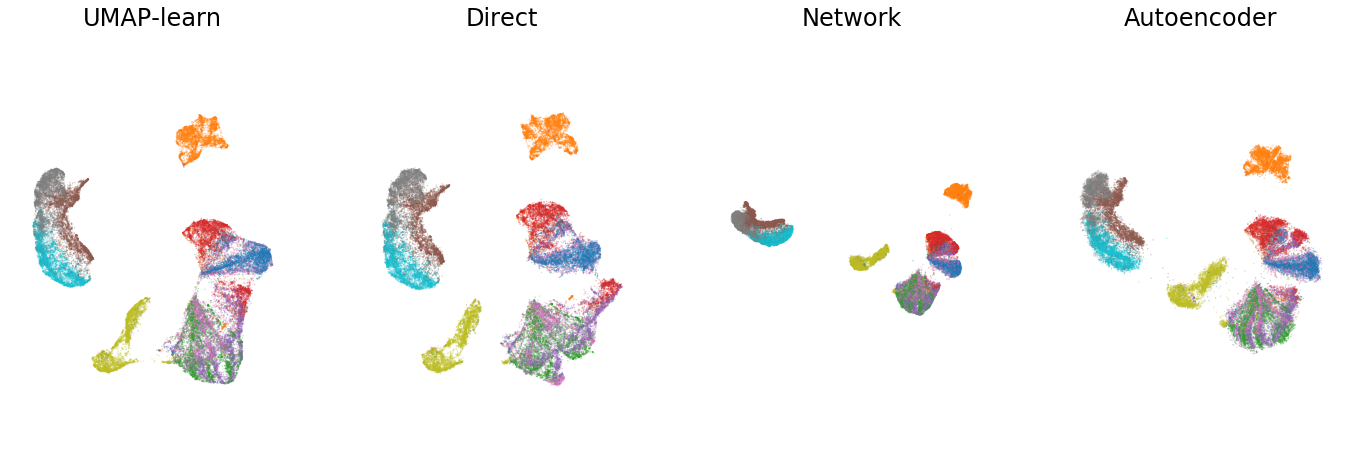

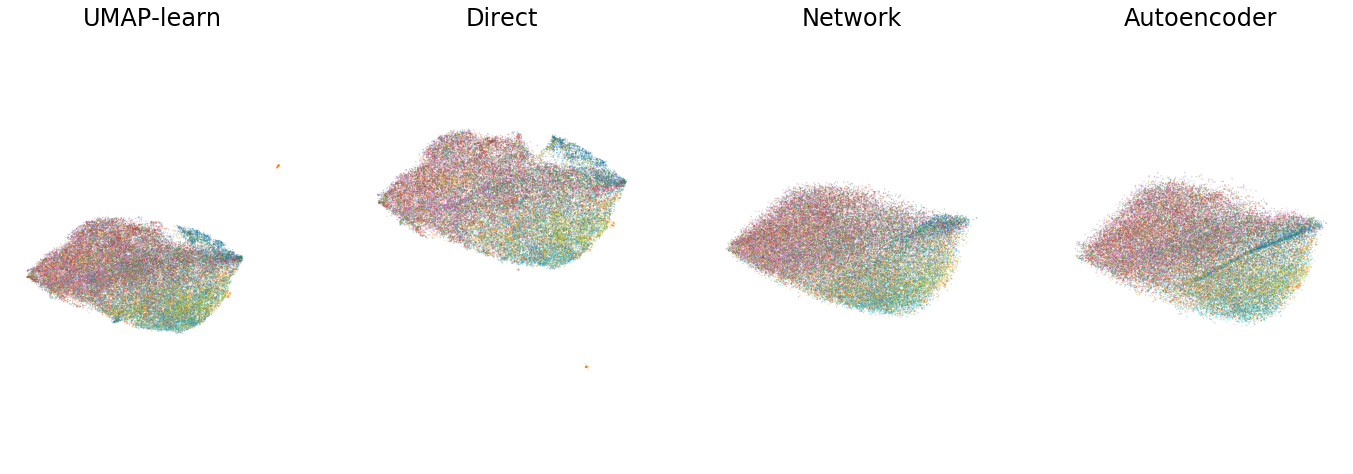

In [59]:
for dataset in dataset_list:
    dataset_subset = dataset_subsets[dataset]
    fig, axs = plt.subplots(ncols = len(unique_classes)+1, figsize = (24,8))
    ax = axs[0]
    z = dataset_subset.iloc[umap_learn_row].aligned
    y = datasets[dataset]['Y']['train']
    sc = ax.scatter(
        z[:, 0],
        z[:, 1],
        c=y,
        cmap=dset_params[dataset]['cmap'],
        s=dset_params[dataset]['s'],
        alpha=dset_params[dataset]['alpha'],
        rasterized=True,
    )
    ax.axis('equal')
    ax.axis('off')
    ax.set_title('UMAP-learn', fontsize=24)
    for i, unique_class in enumerate(unique_classes):
        ax = axs[i+1]
        class_row = np.where(dataset_subset.class_.values == unique_class)[0][0]
        z = dataset_subset.iloc[class_row].aligned
        sc = ax.scatter(
            z[:, 0],
            z[:, 1],
            c=y,
            cmap=dset_params[dataset]['cmap'],
            s=dset_params[dataset]['s'],
            alpha=dset_params[dataset]['alpha'],
        )
        ax.axis('equal')
        ax.axis('off')
        ax.set_title(unique_class.capitalize(), fontsize=24)
    plt.show()